In [241]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

In [242]:
merged_file = pd.read_csv('.\Market_food_prices_w_temp_converted.csv')
merged_file.columns = ['country_id'	,'country','locality_id','locality_name','mkt_id','mkt_name','commodity_purchase_id',
                       'commodity_purchased','currency_id','currency_name','mkt_type_id','mkt_type','measurement_id',
                       'measurement_unit','price_paid','commodity_source','measurement_const','measurement_unit_type',
                       'avg_temp','avg_temp_uncty','period','price_in_USD','converted_const','converted_unit']

In [243]:
print("Merged file")
print("="*60)
print(merged_file.info())
print("="*60)
print("Shape of the file")
print("="*60)
print(merged_file.shape)
print("="*60)
print("Unique values")
print("="*60)
print(merged_file.nunique())
print("="*60)
print("Describe the file")
print("="*60)
print(merged_file.describe(include='all'))

Merged file
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307901 entries, 0 to 307900
Data columns (total 24 columns):
country_id               307901 non-null int64
country                  307901 non-null object
locality_id              307901 non-null int64
locality_name            302089 non-null object
mkt_id                   307901 non-null int64
mkt_name                 307901 non-null object
commodity_purchase_id    307901 non-null int64
commodity_purchased      307901 non-null object
currency_id              307901 non-null int64
currency_name            307901 non-null object
mkt_type_id              307901 non-null int64
mkt_type                 307901 non-null object
measurement_id           307901 non-null int64
measurement_unit         307901 non-null object
price_paid               307901 non-null float64
commodity_source         307901 non-null object
measurement_const        307901 non-null float64
measurement_unit_type    307901 non-null object
avg_temp          

Check the count of the following fields: Commodity Source, Market Type

In [244]:
print('='*90)
print('Commodity Source')
print('='*90)
df_commodity_source = merged_file.groupby('commodity_source')
print(df_commodity_source['country'].value_counts())
print('='*90)
print('Market Type')
print('='*90)
df_mkt_type = merged_file.groupby('mkt_type')
print(df_mkt_type['country'].value_counts())
print('='*90)
print(merged_file['converted_const'].mean())

Commodity Source
commodity_source                                                                country                 
ABPMDD, MoAD                                                                    Nepal                        3916
ACF/ACTED/Solidarite/WFP                                                        Central African Republic       47
AGRONET                                                                         Colombia                     3365
Agricultural Marketing Office, Ministry of Agriculture, Forestry and Fisheries  Cambodia                     1020
Arid Lands Resource Management Project (ALRMP)                                  Kenya                         669
BOS                                                                             Lesotho                      2517
BPS (National Statistics Agency)                                                Indonesia                     879
Bureau of Agricultural Statistics                                               

C:\Users\Janelle\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


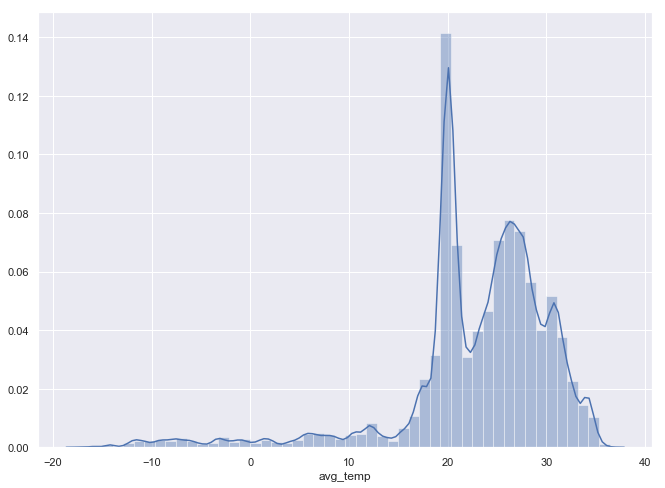

In [245]:
#lt.plot(merged_file['price_in_USD'])
#plt.figure(figsize=(10,6))
#plt.show()
sns.distplot(merged_file['avg_temp'], hist=True)
#merged_file['mkt_type_id'].plot(kind='bar')

C:\Users\Janelle\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


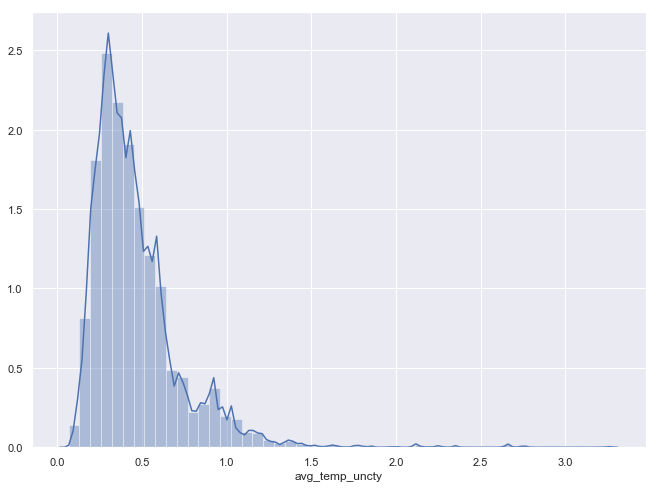

In [246]:
sns.distplot(merged_file['avg_temp_uncty'], hist=True)

C:\Users\Janelle\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


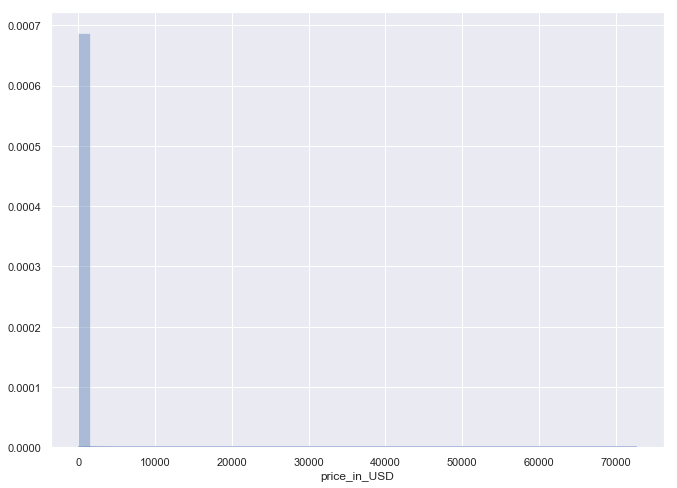

In [247]:
sns.distplot(merged_file['price_in_USD'], hist=True)

C:\Users\Janelle\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


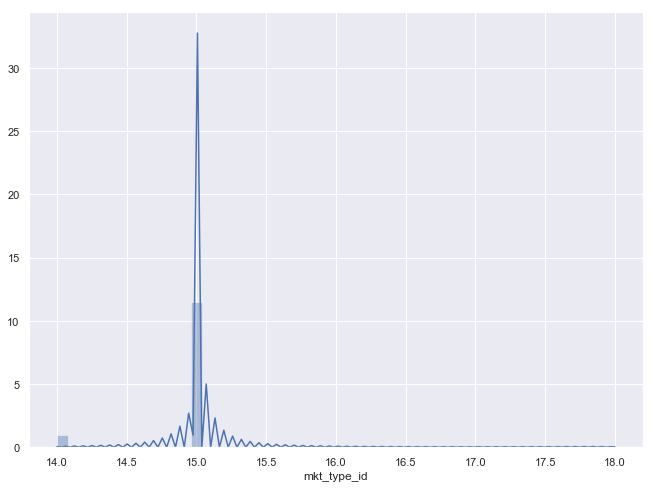

In [248]:
#ax=sns.barplot(x=merged_file['mkt_type_id'].value_counts(), y=merged_file['mkt_type_id'] ,)
#ax.set(xlabel='market type id count', ylabel='market type id')
ax = sns.distplot(merged_file['mkt_type_id'] )

Convert commodity source to numeric for plotting

In [249]:
labels = merged_file['commodity_source'].astype('category').cat.categories.tolist()
replace_map_comp = {'commodity_source' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
merged_file_replace = merged_file.copy()
merged_file_replace.replace(replace_map_comp, inplace=True)
merged_file_replace.to_csv('.\Market_food_prices_w_temp_replaced.csv', index=False)

C:\Users\Janelle\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


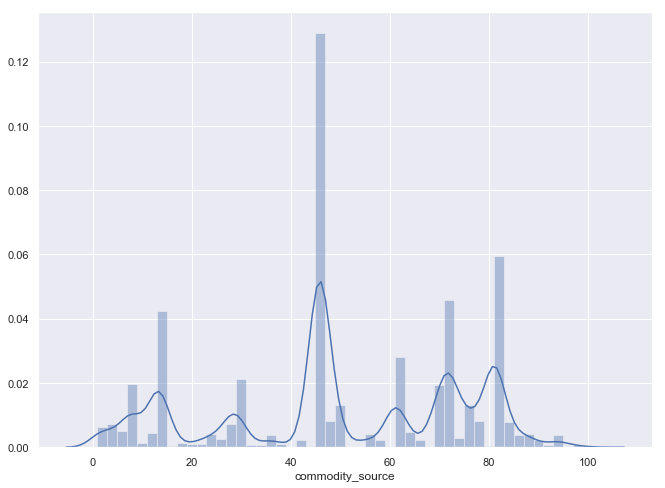

In [250]:
plt.figure()
#ax = sns.barplot(x=merged_file_replace['commodity_source'] ,y=merged_file_replace['commodity_source'].value_counts())
ax = sns.distplot(merged_file_replace['commodity_source'] , hist=True)
#ax.set(xlabel='commodity source', ylabel='commodity source count')

Chi-squared test for independence

In [253]:
max_row = len(merged_file_replace)
chi2_chk = np.array([merged_file_replace['mkt_type_id'][0:max_row].values,
                  merged_file_replace['country_id'][0:max_row].values])
stats.chi2_contingency(chi2_chk)[0:3]

(18661514.848281886, 0.0, 307900)

In [254]:
chi2_chk = np.array([merged_file_replace['commodity_source'][0:max_row].values,
                  merged_file_replace['country_id'][0:max_row].values])
stats.chi2_contingency(chi2_chk)[0:3]

(56310776.3253108, 0.0, 307900)

In [255]:
chi2_chk = np.array([merged_file_replace['commodity_purchase_id'][0:max_row].values,
                  merged_file_replace['country_id'][0:max_row].values])
stats.chi2_contingency(chi2_chk)[0:3]

(108336866.08932017, 0.0, 307900)